In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

**STEP 0: Select the columns that we are going to use for our model**

In [2]:
top_hot_songs = pd.read_csv('hot_songs_audio.csv')
top_hot_songs

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name
0,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,...,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus
1,3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.05430,0.169000,0.1610,...,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,snooze,sza
2,2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.41700,0.000000,0.0822,...,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,creepin',"metro boomin, the weeknd & 21 savage"
3,0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,...,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,anti-hero,taylor swift
4,3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,...,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1zsPaEkglFvxjAhrM8yhpr,0.901,0.589,1,-6.713,0,0.2890,0.00302,0.000237,0.0992,...,98.002,audio_features,1zsPaEkglFvxjAhrM8yhpr,spotify:track:1zsPaEkglFvxjAhrM8yhpr,https://api.spotify.com/v1/tracks/1zsPaEkglFvx...,https://api.spotify.com/v1/audio-analysis/1zsP...,196600,4,hey mor,ozuna featuring feid
93,54ELExv56KCAB4UP9cOCzC,0.892,0.662,8,-3.894,1,0.1620,0.16900,0.000001,0.3630,...,93.976,audio_features,54ELExv56KCAB4UP9cOCzC,spotify:track:54ELExv56KCAB4UP9cOCzC,https://api.spotify.com/v1/tracks/54ELExv56KCA...,https://api.spotify.com/v1/audio-analysis/54EL...,227013,4,gato de noche,nengo flow & bad bunny
94,7EAMXbLcL0qXmciM5SwMh2,0.901,0.136,8,-16.127,0,0.1020,0.66700,0.354000,0.1090,...,150.076,audio_features,7EAMXbLcL0qXmciM5SwMh2,spotify:track:7EAMXbLcL0qXmciM5SwMh2,https://api.spotify.com/v1/tracks/7EAMXbLcL0qX...,https://api.spotify.com/v1/audio-analysis/7EAM...,211140,4,heart to heart,mac demarco
95,6sZo5nJIsFWXefRCCexpx0,0.668,0.802,5,-4.005,0,0.0917,0.02730,0.000000,0.1630,...,113.796,audio_features,6sZo5nJIsFWXefRCCexpx0,spotify:track:6sZo5nJIsFWXefRCCexpx0,https://api.spotify.com/v1/tracks/6sZo5nJIsFWX...,https://api.spotify.com/v1/audio-analysis/6sZo...,225789,4,never gonna not dance again,p!nk


In [3]:
top_hot_songs.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'song_name', 'artist_name'],
      dtype='object')

In [10]:
top_hot_songs['hot?'] = 'hot'
top_hot_songs.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,hot?
0,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,...,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus,hot
1,3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,snooze,sza,hot
2,2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,...,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,creepin',"metro boomin, the weeknd & 21 savage",hot
3,0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,...,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,anti-hero,taylor swift,hot
4,3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,...,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras,hot


In [6]:
top_hot_songs_sliced = top_hot_songs[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','duration_ms']]

In [7]:
top_hot_songs_sliced

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.728,8,-5.750,1,0.0351,0.05430,0.169000,0.1610,0.430,88.993,153947
2,0.715,0.620,1,-6.005,0,0.0484,0.41700,0.000000,0.0822,0.172,97.950,221520
3,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690
4,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,156943
...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.901,0.589,1,-6.713,0,0.2890,0.00302,0.000237,0.0992,0.399,98.002,196600
93,0.892,0.662,8,-3.894,1,0.1620,0.16900,0.000001,0.3630,0.607,93.976,227013
94,0.901,0.136,8,-16.127,0,0.1020,0.66700,0.354000,0.1090,0.643,150.076,211140
95,0.668,0.802,5,-4.005,0,0.0917,0.02730,0.000000,0.1630,0.769,113.796,225789


In [11]:
not_hot_songs = pd.read_csv('not_hot_songs_audio.csv')
not_hot_songs['hot?'] = 'not_hot'

In [13]:
all_songs = pd.concat([top_hot_songs, not_hot_songs], axis=0)
all_songs

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,hot?
0,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,...,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus,hot
1,3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,snooze,sza,hot
2,2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,...,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,creepin',"metro boomin, the weeknd & 21 savage",hot
3,0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,...,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,anti-hero,taylor swift,hot
4,3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,...,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras,hot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2L21CMOOqvrimKXqLIpTuX,0.842,0.681,8,-6.022,1,0.0492,0.7550,0.000062,0.2830,...,audio_features,2L21CMOOqvrimKXqLIpTuX,spotify:track:2L21CMOOqvrimKXqLIpTuX,https://api.spotify.com/v1/tracks/2L21CMOOqvri...,https://api.spotify.com/v1/audio-analysis/2L21...,226440,4,thiên đàng,"wowy, jolipoli",not_hot
2230,0nYiryEA1YyZWpbIxKtStQ,0.743,0.666,0,-5.466,0,0.0581,0.3080,0.000000,0.1140,...,audio_features,0nYiryEA1YyZWpbIxKtStQ,spotify:track:0nYiryEA1YyZWpbIxKtStQ,https://api.spotify.com/v1/tracks/0nYiryEA1YyZ...,https://api.spotify.com/v1/audio-analysis/0nYi...,205359,4,vitesse,"landy, hornet la frappe",not_hot
2231,1vFWBHNjJAPoeWcBOJk9Gp,0.658,0.742,8,-6.170,1,0.1200,0.0434,0.000000,0.2460,...,audio_features,1vFWBHNjJAPoeWcBOJk9Gp,spotify:track:1vFWBHNjJAPoeWcBOJk9Gp,https://api.spotify.com/v1/tracks/1vFWBHNjJAPo...,https://api.spotify.com/v1/audio-analysis/1vFW...,191263,4,non ti dico no,"boomdabash, loredana bertè",not_hot
2232,0KRAQpoakCf6ngwMTZIwfJ,0.547,0.800,5,-3.133,1,0.0345,0.0172,0.806000,0.1420,...,audio_features,0KRAQpoakCf6ngwMTZIwfJ,spotify:track:0KRAQpoakCf6ngwMTZIwfJ,https://api.spotify.com/v1/tracks/0KRAQpoakCf6...,https://api.spotify.com/v1/audio-analysis/0KRA...,132441,4,selamanya,usop,not_hot


In [14]:
all_songs_sliced = all_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                              'instrumentalness', 'liveness','valence', 'tempo','duration_ms']]

**STEP X: Keep going with DBSCAN**

**A demo for just one model**

In [17]:
scaler = StandardScaler().fit(all_songs_sliced)
X_scaled_np = scaler.transform(all_songs_sliced)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=all_songs_sliced.columns)


**TO GET THE BEST EPSILON**

**Steps to get the best distance (Pick MinPoints = 2xnumber_of_features)**

In [18]:
d = distance_matrix(X_scaled_df,X_scaled_df) #distance between each point
print(d)
print()

[[0.         3.17358014 3.36832676 ... 3.47822545 6.06226336 4.03446131]
 [3.17358014 0.         3.85445862 ... 3.66789563 4.93918521 2.88863893]
 [3.36832676 3.85445862 0.         ... 5.14961852 6.7001888  4.65231713]
 ...
 [3.47822545 3.66789563 5.14961852 ... 0.         6.01362941 3.45158739]
 [6.06226336 4.93918521 6.7001888  ... 6.01362941 0.         5.89886095]
 [4.03446131 2.88863893 4.65231713 ... 3.45158739 5.89886095 0.        ]]



In [19]:
d2 = np.sort(d)[:,1:] #short by row, descarting the first column
print(d2)

[[ 0.66323064  0.85669013  1.00021139 ... 12.79762164 13.0562881
  14.39198234]
 [ 1.37967864  1.49005682  1.59156153 ... 11.95854353 12.15649636
  14.21923763]
 [ 0.          1.095941    1.23968033 ... 12.00288273 12.18002207
  13.16172361]
 ...
 [ 0.90296585  1.10025808  1.27292428 ... 13.13871007 13.35705905
  14.39579245]
 [ 2.23158901  2.78842381  2.81368027 ... 11.98643522 12.03948469
  15.71276857]
 [ 1.03154278  1.59543112  1.74929193 ... 13.15959929 13.29625166
  14.6222219 ]]


In [20]:
f = d2[:,23]
print(f)

[1.52150481 1.96283006 1.96039556 ... 1.89324565 4.1625244  2.3159644 ]


In [21]:
f_final = np.sort(f)[::-1] #sort in descending order
print()
print(f_final)


[10.49248799  7.44259658  7.43883199 ...  1.31309958  1.30984177
  1.2900284 ]


**Plot the distances**

C:\Users\Pablo\AppData\Local\Temp\ipykernel_1524\1803507378.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


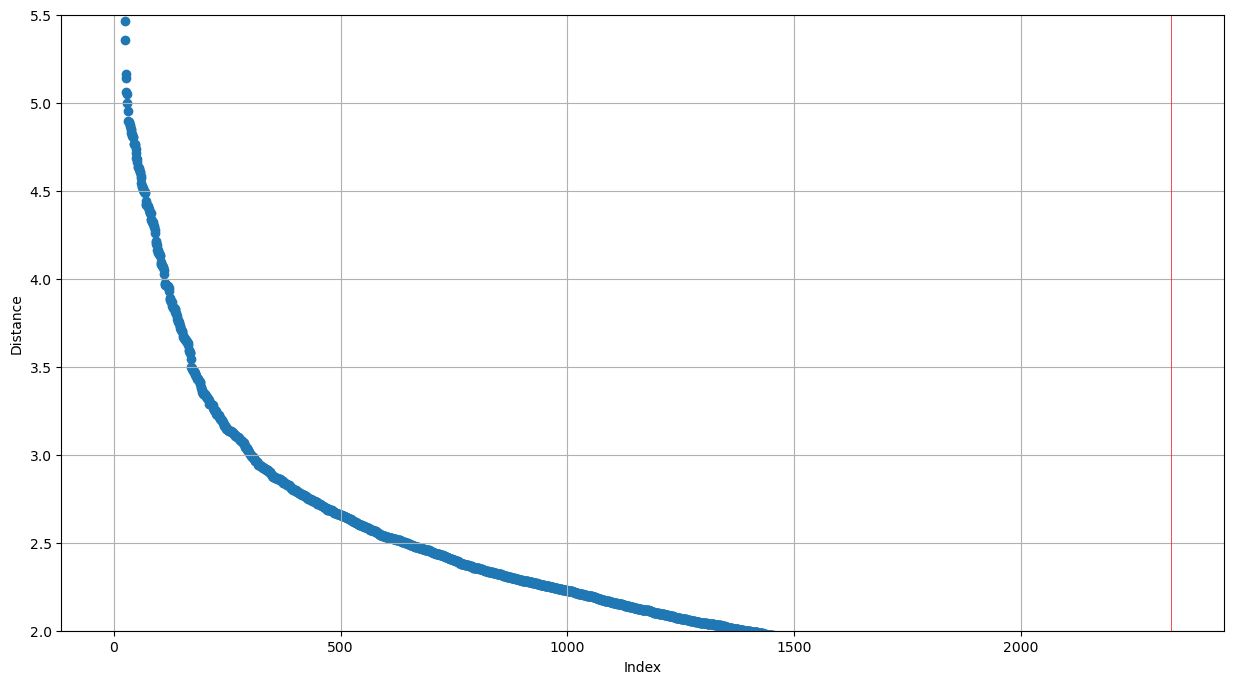

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
ax.set_ylim(2,5.5,0.1)
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

After making the zoom in it seems that the right distance should be between 2.5 and 3.5 so we train our models with between it in order to get the right epsilon

**Exploring epsilon in the elbow**

In [28]:
models = {}

for value in np.arange(2.5, 3.6, 0.1):
    model = DBSCAN(eps=value, min_samples=24) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df)
    #pickle code to save models
    # filename = "¨dbscan_"+str(value)+".pickle"
    filename = "dbscan_" + str(value) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(model,file)

    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

    

**Now we display the Silohuette vs Epsilon in order to pick one**

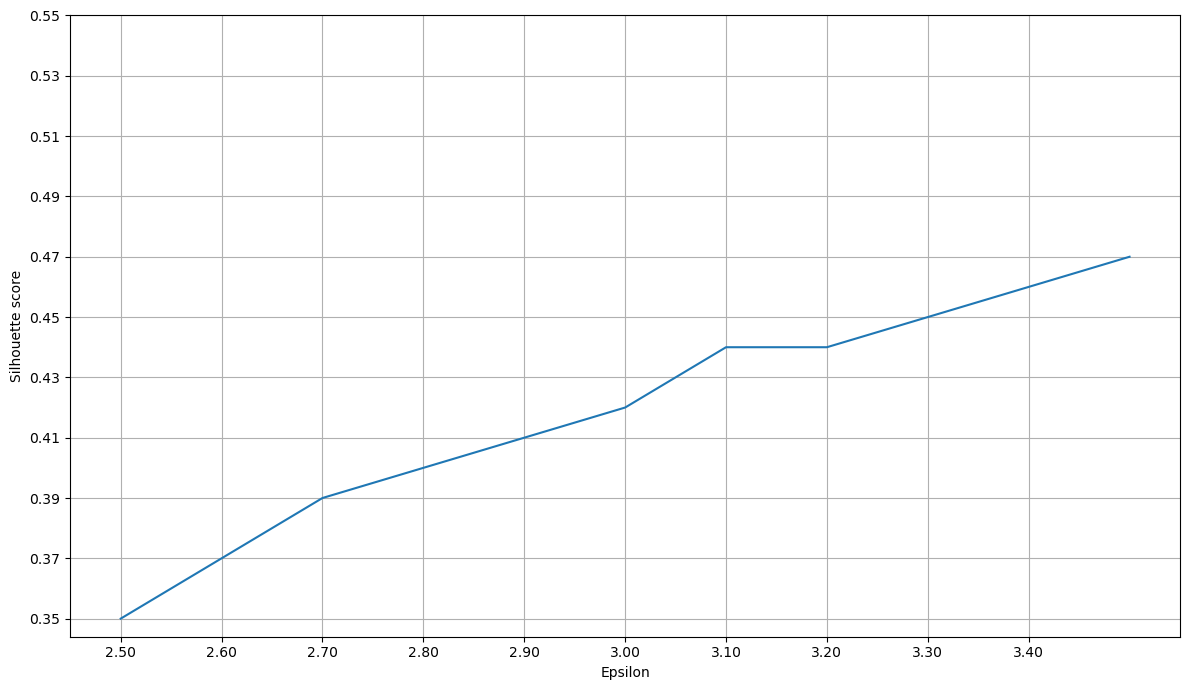

In [31]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(2.5, 3.6, 0.1)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

It seems that models with Epsilon = 3.1, 3.2 or 3.5 could be nice

In [32]:
# retrieve unique clusters of one model
clusters1 = np.unique(models["model_3.1"]["yhat"])
clusters1

array([-1,  0], dtype=int64)

In [33]:
clusters2 = np.unique(models["model_3.2"]["yhat"])
clusters2

array([-1,  0], dtype=int64)

In [34]:
clusters3 = np.unique(models["model_3.5"]["yhat"])
clusters3

array([-1,  0], dtype=int64)

But they has just 1 cluster and noise, so we have to **discard DBSCAN**

In [35]:
models["model_3.1"]["score"]

0.44

In [36]:
models["model_3.2"]["score"]

0.44

In [37]:
models["model_3.3"]["score"]

0.45

In [38]:
len(list(models.keys()))

11

In [39]:
list(models.items())

[('model_2.5',
  {'model': DBSCAN(eps=2.5, min_samples=24),
   'yhat': array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64),
   'score': 0.35}),
 ('model_2.6',
  {'model': DBSCAN(eps=2.6, min_samples=24),
   'yhat': array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64),
   'score': 0.37}),
 ('model_2.7',
  {'model': DBSCAN(eps=2.7, min_samples=24),
   'yhat': array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64),
   'score': 0.39}),
 ('model_2.8',
  {'model': DBSCAN(eps=2.8000000000000003, min_samples=24),
   'yhat': array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64),
   'score': 0.4}),
 ('model_2.9',
  {'model': DBSCAN(eps=2.9000000000000004, min_samples=24),
   'yhat': array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64),
   'score': 0.41}),
 ('model_3.0',
  {'model': DBSCAN(eps=3.0000000000000004, min_samples=24),
   'yhat': array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64),
   'score': 0.42}),
 ('model_3.1',
  {'model': DBSCAN(eps=3.1000000000000005, min_samples=24),
   'yhat': array([ 0,  0,  0,

In [42]:
all_songs_df = all_songs
all_songs_df = all_songs_df.drop(['Unnamed: 0'], axis=1)

In [43]:
all_songs_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,hot?
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,...,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus,hot
1,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,snooze,sza,hot
2,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,...,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,creepin',"metro boomin, the weeknd & 21 savage",hot
3,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,...,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,anti-hero,taylor swift,hot
4,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,...,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras,hot


In [44]:
all_songs_df.to_csv('all_song_classified.csv',index=False)